In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [3]:
df_bigmart = pd.read_csv('D:/Academics/AI & MACHINE LEARNING/Courses/Course 3 - Machine Learning/Demo Datasets/Lesson 4/bigmart_test.csv')

In [3]:
df_bigmart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [4]:
df_bigmart.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
df_bigmart.shape

(5681, 11)

In [6]:
df_bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
df_bigmart['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [8]:
df_bigmart['Outlet_Establishment_Year'].unique()

array([1999, 2007, 1998, 1985, 1997, 2009, 2002, 1987, 2004], dtype=int64)

In [9]:
df_bigmart['Outlet_Age'] = 2021-df_bigmart['Outlet_Establishment_Year']
df_bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,22
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,14
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,23
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,14
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,36


In [10]:
df_bigmart['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [11]:
df_bigmart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Age
count,4705.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903,23.171097
std,4.664849,0.051252,61.809091,8.372256,8.372256
min,4.555000,0.000000,31.990000,1985.000000,12.000000
25%,8.645000,0.027047,94.412000,1987.000000,17.000000
50%,12.500000,0.054154,141.415400,1999.000000,22.000000
75%,16.700000,0.093463,186.026600,2004.000000,34.000000
max,21.350000,0.323637,266.588400,2009.000000,36.000000


In [12]:
df_bigmart['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [13]:
df_bigmart['Outlet_Size'].mode()[0]

'Medium'

In [14]:
df_bigmart['Outlet_Size'] = df_bigmart['Outlet_Size'].fillna(df_bigmart['Outlet_Size'].mode()[0])

In [15]:
df_bigmart['Item_Weight'] = df_bigmart['Item_Weight'].fillna(df_bigmart['Item_Weight'].mean())

<AxesSubplot:>

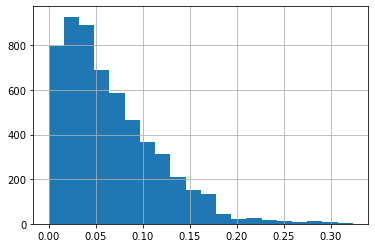

In [16]:
df_bigmart['Item_Visibility'].hist(bins=20)

In [17]:
Q1 = df_bigmart['Item_Visibility'].quantile(0.25)
Q3 = df_bigmart['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
filt_df_bigmart = df_bigmart.query('(@Q1 - 1.5*@IQR)<= Item_Visibility <= (@Q3 - 1.5*@IQR)')

In [18]:
filt_df_bigmart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age


In [19]:
filt_df_bigmart.shape, df_bigmart.shape

((0, 12), (5681, 12))

In [20]:
df_bigmart['Item_Visibility_bins'] = pd.cut(df_bigmart['Item_Visibility'],[0.000, 0.065, 0.13, 0.2], labels= ['Low Viz', 'Viz', 'High Viz'])

In [21]:
df_bigmart['Item_Visibility_bins'].value_counts()

Low Viz     2960
Viz         1726
High Viz     536
Name: Item_Visibility_bins, dtype: int64

In [22]:
df_bigmart['Item_Visibility_bins'] = df_bigmart['Item_Visibility_bins'].replace(np.nan, 'Low Viz', regex = True)

In [23]:
df_bigmart['Item_Fat_Content'] = df_bigmart['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')

In [24]:
df_bigmart['Item_Fat_Content'] = df_bigmart['Item_Fat_Content'].replace(['reg'], 'Regular')

In [25]:
df_bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Visibility_bins
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,22,Low Viz
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,14,Low Viz
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,23,Viz
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,14,Low Viz
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,36,Viz


In [26]:
df_bigmart['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [27]:
le = LabelEncoder()

In [28]:
df_bigmart['Item_Fat_Content'] = le.fit_transform(df_bigmart['Item_Fat_Content'])

In [29]:
df_bigmart['Item_Visibility_bins'] = le.fit_transform(df_bigmart['Item_Visibility_bins'])

In [30]:
df_bigmart['Outlet_Size'] = le.fit_transform(df_bigmart['Outlet_Size'])

In [31]:
df_bigmart['Outlet_Location_Type'] = le.fit_transform(df_bigmart['Outlet_Location_Type'])

In [32]:
dummy = pd.get_dummies(df_bigmart['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1


In [33]:
df_bigmart = pd.concat([df_bigmart, dummy], axis = 1)

In [34]:
df_bigmart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Outlet_Age                     int64
Item_Visibility_bins           int32
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [35]:
df_bigmart = df_bigmart.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], axis = 1)

In [36]:
df_bigmart.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Age', 'Item_Visibility_bins', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [37]:
df_bigmart.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,20.750000,0,0.007565,107.8622,1999,1,0,22,1,0,1,0,0
1,8.300000,1,0.038428,87.3198,2007,1,1,14,1,0,1,0,0
2,14.600000,0,0.099575,241.7538,1998,1,2,23,2,1,0,0,0
3,7.315000,0,0.015388,155.0340,2007,1,1,14,1,0,1,0,0
4,12.695633,1,0.118599,234.2300,1985,1,2,36,2,0,0,0,1
